In [10]:
from rmgpy.rmg.model import Species
from rmgpy.data.thermo import ThermoDatabase, NASA

In [11]:
spc = Species().fromSMILES('C=C1C2[CH]C=CC12')

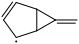

In [12]:
spc

In [37]:
thermodb = ThermoDatabase()
path = '/Users/kehang/Code/ipso_training/RMG-database/input/thermo'
thermodb.load(path)

In [38]:
# calculate thermo
thermo = thermodb.getThermoData(spc, None, None)
_ = spc.processThermoData(None, thermo, NASA)

In [39]:
thermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([26.06,34.62,41.56,47,54.85,60.28,68.38],'cal/(mol*K)'), H298=(103.96,'kcal/mol'), S298=(77.63,'cal/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(332.579,'J/(mol*K)'), comment="""Thermo library: vinylCPD_H""")

In [40]:
estimatedThermo = thermodb.getThermoDataFromGroups(spc)
estimatedThermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([127.779,161.168,189.828,211.71,244.973,267.609,300.495],'J/(mol*K)'), H298=(236.969,'kJ/mol'), S298=(44.9469,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(332.579,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cs-(Cds-Cds)CsCsH) + other(R) + group(Cs-(Cds-Cds)(Cds-Cds)CsH) + other(R) + group(Cds-CdsCsCs) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsHH) + other(R) + polycyclic(PolycyclicRing) + radical(cyclopentene-allyl)""")

In [28]:
thermodb.groups['polycyclic'].entries['PolycyclicRing'].data

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([0,0,0,0,0,0,0],'cal/(mol*K)'), H298=(0,'kcal/mol'), S298=(0,'cal/(mol*K)'), comment="""polycyclic(PolycyclicRing)""")

In [36]:
print thermodb.groups['polycyclic'].entries['bicyclo-(3.1.0)-hexane'].item.toAdjacencyList()

1 * Cs u0 {2,S} {3,S} {5,S}
2   Cs u0 {1,S} {3,S} {4,S}
3   Cs u0 {1,S} {2,S}
4   Cs u0 {2,S} {6,S}
5   Cs u0 {1,S} {6,S}
6   Cs u0 {4,S} {5,S}

